In [1]:
import pandas as pd 
import numpy as np
#reading input file
data=pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#data=pd.read_csv('36305afe7c19e8189f6f93a6f08ff9db112444077addc3a2eeb765a7.csv')

#sorting data 
data.sort_values(by=['Date'],ascending=True,inplace=True)

#converting tenths of degree celsius to celsius
data['Data_Value']=data['Data_Value']/10

#date column to pd.to_datetime
data['Date']=(pd.to_datetime(data['Date']))

#extracting year
data['Year']=data['Date'].dt.year

#extract month-day
data['Month Day']=data['Date'].dt.strftime('%m/%d')

#excluding 29th Feb data points
data=data[data['Month Day']!='02/29']

#dividng the dataset based on column element
data_min=data[(data.Element == 'TMIN') & (data.Year>=2005) & (data.Year<=2014)]
data_max=data[(data.Element == 'TMAX') & (data.Year>=2005) & (data.Year<=2014)]

min_grouped=data_min.groupby('Month Day')['Data_Value'].agg({'Min_temp':np.min})
max_grouped=data_max.groupby('Month Day')['Data_Value'].agg({'Max_temp':np.max})

min_grouped.reset_index(inplace=True)
max_grouped.reset_index(inplace=True)

#2015 data
data_2015_min=data[(data.Year==2015) & (data.Element=='TMIN')]
data_2015_min=data_2015_min.groupby('Month Day')['Data_Value'].min()
data_2015_min_df=pd.DataFrame({'Month Day':data_2015_min.index, 'Min_temp_2015':data_2015_min.values})

data_2015_max=data[(data.Year==2015) & (data.Element=='TMAX')]
data_2015_max=data_2015_max.groupby('Month Day')['Data_Value'].max()
data_2015_max_df=pd.DataFrame({'Month Day':data_2015_max.index, 'Max_temp_2015':data_2015_max.values})

#finding record high and min for 2015
#extract 2015 data into another df
min_2015_record_broken=pd.merge(min_grouped,data_2015_min_df,how="inner",on=['Month Day'])
min_2015_record_broken=min_2015_record_broken[(min_2015_record_broken.Min_temp_2015 < min_2015_record_broken.Min_temp)]

max_2015_record_broken=pd.merge(max_grouped,data_2015_max_df,how="inner",on=['Month Day'])
max_2015_record_broken=max_2015_record_broken[(max_2015_record_broken.Max_temp_2015 > max_2015_record_broken.Max_temp)]



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


In [2]:
#dates for records broken in 2015
for index,row in min_2015_record_broken.iterrows():
    min_2015_record_broken.at[index,'Dates']=(pd.to_datetime((row['Month Day'])+'/2015')).strftime('%Y-%m-%d')
    
for index,row in max_2015_record_broken.iterrows():
    max_2015_record_broken.at[index,'Dates']=(pd.to_datetime((row['Month Day'])+'/2015')).strftime('%Y-%m-%d')

In [3]:
import datetime
#dates for x-axis
dates=pd.date_range('2015-01-01','2015-12-31').to_pydatetime()

#len(dates)
new_dates=[]
end_month=[]
for i in range(0,len(dates)):
    new_dates.append(dates[i].strftime('%Y-%m-%d'))
    if(i!=364 and dates[i].strftime('%m')!=dates[i+1].strftime('%m')):
        end_month.append(dates[i])
   
end_month.append(dates[364])


<IPython.core.display.Javascript object>


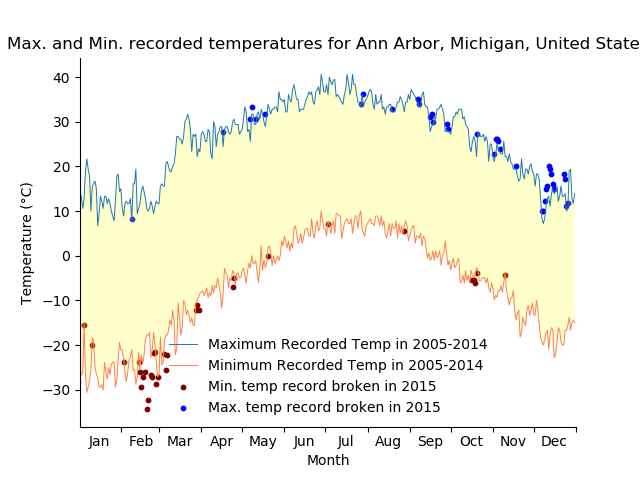

In [4]:
#plotting
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


plt.plot(new_dates,max_grouped['Max_temp'],label='Maximum Recorded Temp in 2005-2014',linewidth=0.7)
plt.plot(new_dates,min_grouped['Min_temp'],label='Minimum Recorded Temp in 2005-2014', linewidth=0.7, color='coral')
plt.scatter(min_2015_record_broken['Dates'],min_2015_record_broken['Min_temp_2015'],s=10, color='maroon',label='Min. temp record broken in 2015')
plt.scatter(max_2015_record_broken['Dates'],max_2015_record_broken['Max_temp_2015'],s=10, color='blue',label='Max. temp record broken in 2015')

ax=plt.gca()
ax.fill_between(new_dates,max_grouped['Max_temp'],min_grouped['Min_temp'],facecolor='yellow',alpha=0.2)
plt.title('Max. and Min. recorded temperatures for Ann Arbor, Michigan, United States')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plotting to start from (0,0)
ax.set_xlim(1,365)

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(frameon=False)
plt.show()

#set tick positions
x_tick_positions=[]
for i in range(0,len(end_month)):
    x_tick_positions.append(int(end_month[i].strftime('%j')))

ax.xaxis.set_ticks(x_tick_positions)
ax.xaxis.set_ticklabels([])

#center the labels using minor ticks
import matplotlib.dates as dates
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

for tick in plt.gca().xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
